In [1]:
import sys
import warnings

sys.path.append('..')

In [2]:
# import statements, configuration and helper methods
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from statsmodels.graphics.gofplots import qqplot # source: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import linregress
from scripts import project_functions as pf



# set theme
sns.set_theme(style="darkgrid")
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True}) # set minor tick
figure_size=[10, 5]

# # fontsizes
# font = {'family' : 'monospace',
#           'weight' : 'bold',
#           'size'   : 34}
SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 20

# plt.rc('font', **font)
# plt.rc('fontsize', )
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.titlesize'] = BIGGER_SIZE



# helper methods
def annotate(x, y):
    """annotate text: <location> at the given data_points"""
    ax.annotate('  ({:.2f}, {:.2f})'.format(x, y), xy=(x, y))

# Exploratory Data Analysis(EDA) on the Happiness Index 2021
created by: Karel Joshua 7/28/2021<br><br>
In this notebook we will visualize and explain the reasoning behind the ladder score that was shown on the Happiness Report 2021. Further in, we will attempt to generate a simple linear regression model and create a prediction interval function for our model. We will discuss and outline the steps that were taken before we can visualize and interpret the data.

#### Research Questions: 
1. Is there a trend between the Logged GDP per capita and Ladder score in the year 2021?
1. What is the minimum level of GDP per capita needed for a country to be considered happy in the year 2021?

## Data Cleaning Process
Fortunately the datasets provided by the World Happiness Report organization contain no missing value and is sorted according to the ladder score. We could check for missing data with the following.

In [3]:
# read data from csv to df
data_2021 = pd.read_csv('../../data/raw/world-happiness-report-2021.csv')
data_2020 = pd.read_csv('../../data/raw/world-happiness-report-2020.csv')

# check for missing value
print(f'null_summary_2021: \n{data_2021.isnull().sum()}')
print(f'null_summary_2020: \n{data_2020.isnull().sum()}')
# no null values for both datasets so proceed to next step

null_summary_2021: 
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64
null_su

## Data Wrangling
In this step we will set up our dataFrame for the visualizing we will do later on. Luckily, we have condensed our data wrangling process into a ready-to-use function. The function can be found under /analysis/scripts/project_functions.py.

In [4]:
df = pf.load_and_process(path_2021='../../data/raw/world-happiness-report-2021.csv', path_2020='../../data/raw/world-happiness-report-2020.csv')
df.head()

,Country name,Regional indicator,Ladder score 2021,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Ladder score 2020,Score difference
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,7.8087,0.0333
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43,7.6456,-0.0256
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43,7.5599,0.0111
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43,7.5045,0.0495
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43,7.4880,-0.0240


# Exploratory Data Analysis - Introduction
To get a grasp of what our data is. Let us first plot the boxplot of the Happiness Score across the region. Note that, Dystopia is an imaginary country described by the World Happiness Report as "a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors."
<br>
<br>
From the following graph, we can see the distribution of the of happiness across different regions. The ladder score is determined by six features. Next we will plot a correlation map between those features and the ladder score.

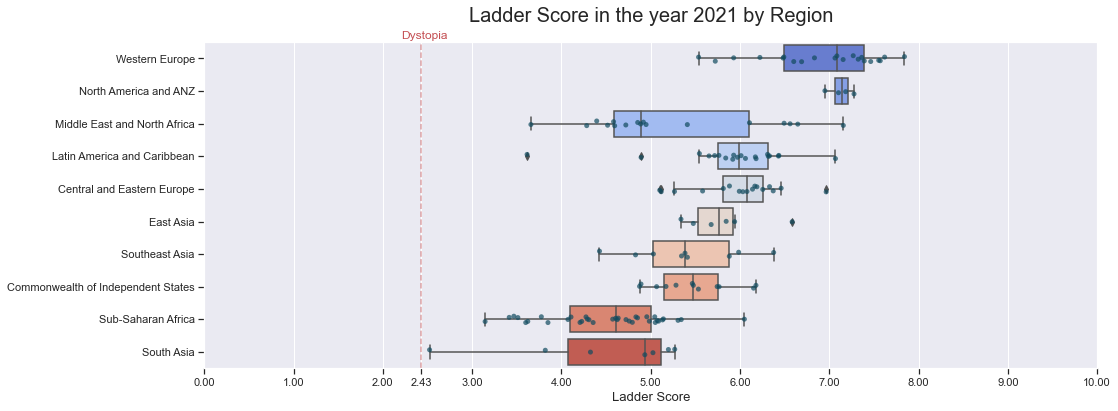

In [5]:
# plotting boxplot per region
fig, ax = plt.subplots(figsize=(16,6))

score_dystopia = df['Ladder score in Dystopia'][0]

ax = sns.boxplot(y='Regional indicator', x='Ladder score 2021', data=df, palette='coolwarm', ax=ax)
ax = sns.stripplot(y='Regional indicator', x='Ladder score 2021', data=df, color='#114b5f', size=5, alpha=.7, ax=ax)
plt.axvline(score_dystopia, color='r', ls='--', alpha=.5)

ax.text(2.2, -0.6, 'Dystopia', color='r')
# high_ladder = df.iloc[df['Ladder score 2021'].idxmax()]['Country name']
# low_ladder = df.iloc[df['Ladder score 2021'].idxmin()]['Country name']
# print(low_ladder)

ax.set_title(label='Ladder Score in the year 2021 by Region', pad=20)
ax.set(xlabel='Ladder Score', ylabel='')
ax.set_xticks(pd.Series([0., 1., 2., score_dystopia, 3., 4., 5., 6., 7., 8., 9., 10.]))

plt.show()

<br>

# Observing Correlation Between Features
To visualize the correlation we first have to calculate the Pearson's r coefficient for each pair of features, then plot a heatmap for the values.
<br><br>
### Heatmap
The graph below shows the linear correlation between the features. From this, it is evident that the happiness score of a country is positively correlated greatly with the logged GDP per capita.

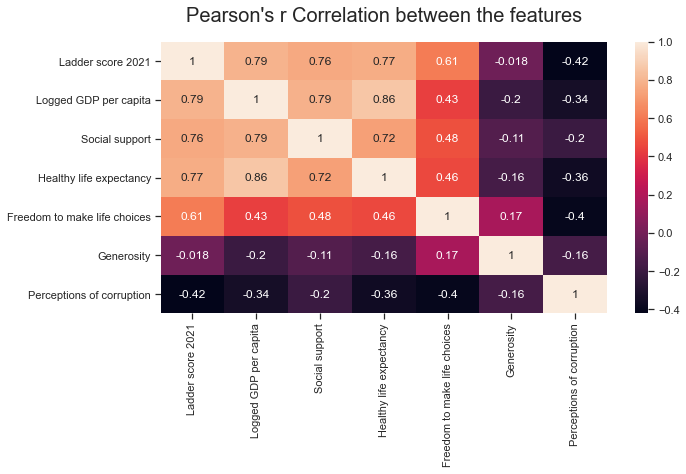

In [6]:
# pick columns to be heatmapped
cols = ['Ladder score 2021', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

df_corr = df[cols].corr() # creating dataFrame containing Pearson's r values to plot heatmap

# plotting heatmap for the features(columns)
fig, ax = plt.subplots(figsize=figure_size)

ax = sns.heatmap(data=df_corr, yticklabels=df_corr.columns, xticklabels=df_corr.columns, annot=True)

ax.set_title(label='Pearson\'s r Correlation between the features', pad=20)
plt.show()

### Pairplot
To visualize each Pearson's r coefficient, let us plot a scatterplot for each pair of our features.

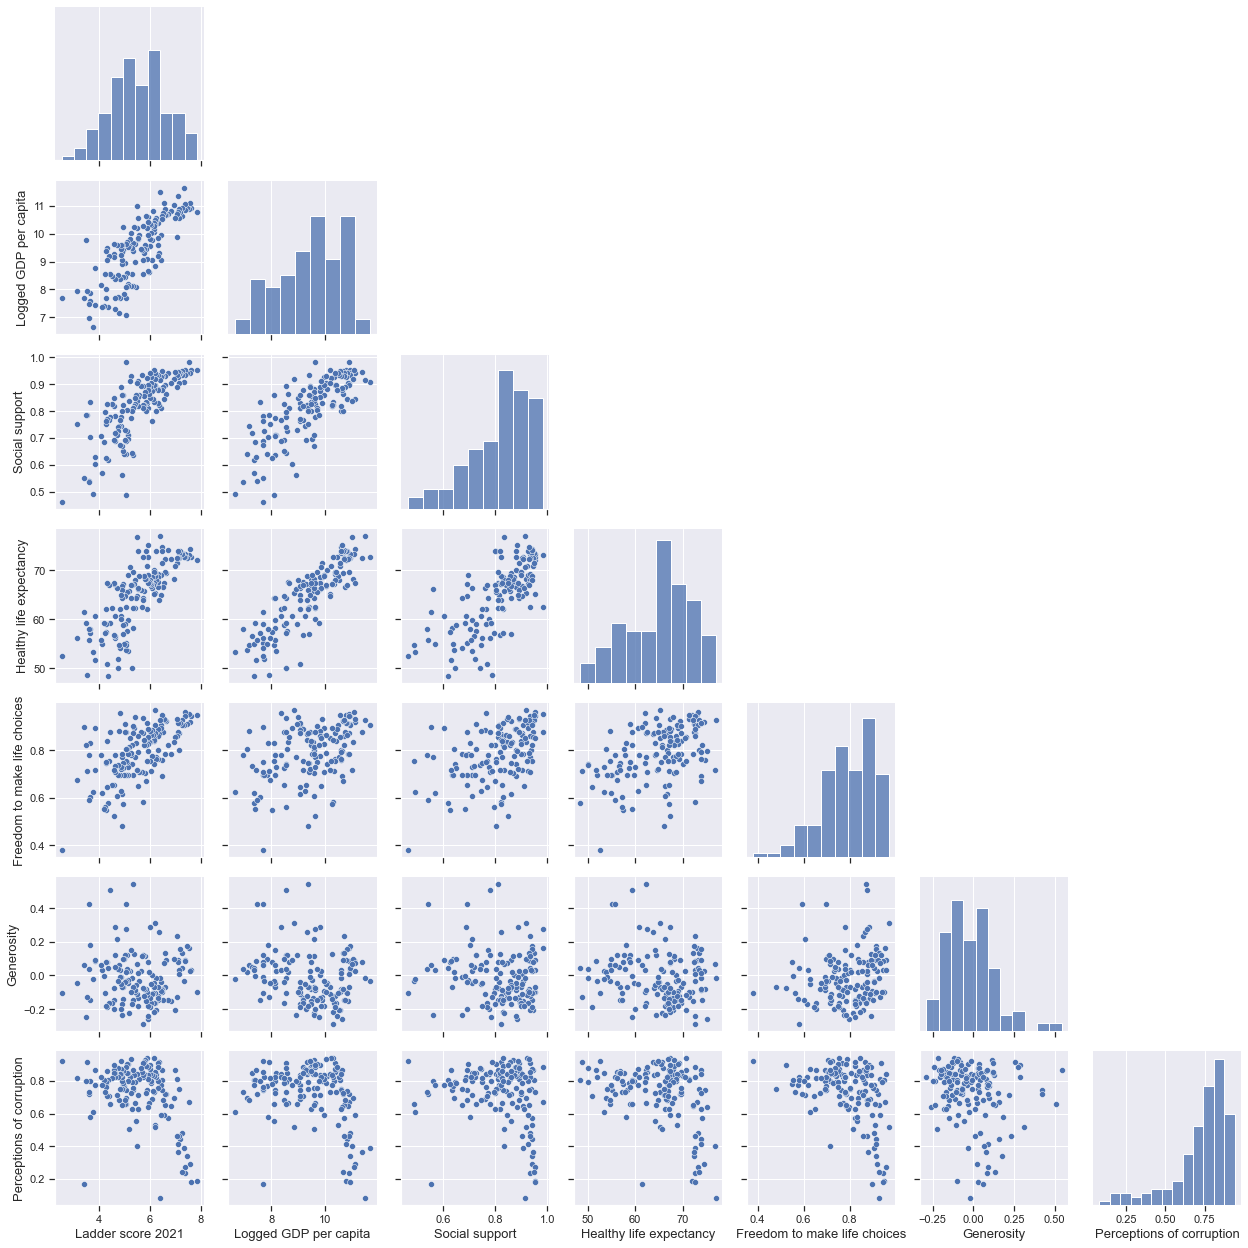

In [7]:
sns.pairplot(data=df[cols], corner=True)
plt.tight_layout()

## Scatterplot Ladder Score to Logged GDP per Capita
We observe that ladder score have the strongest correlation coefficienf of 0.79 with logged GDP per capita. This shows, it is arguable that money can buy one's happiness. Let us plot the datas to visualize their relationship.

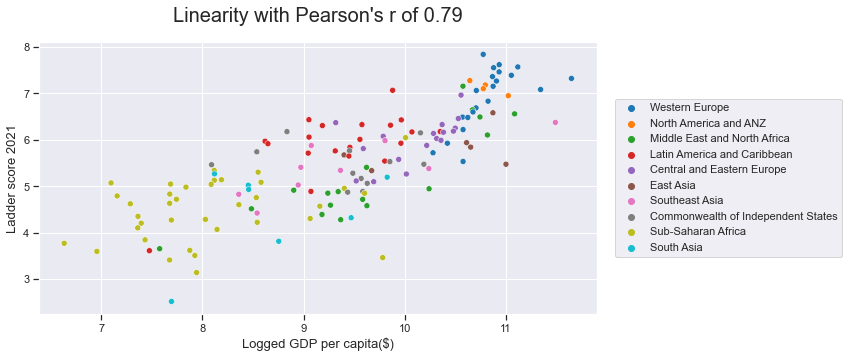

In [8]:
fig, ax = plt.subplots(figsize=figure_size)

x_axis = 'Logged GDP per capita'
y_axis = 'Ladder score 2021'

ax = sns.scatterplot(y=y_axis, x=x_axis, data=df, hue='Regional indicator', palette='tab10')
# ax = sns.regplot(y=y_axis, x=x_axis, data=df, color='navy', scatter=False)

ax.set_title(label='Linearity with Pearson\'s r of 0.79', pad=20)
ax.legend(loc='right', bbox_to_anchor=(1.45, 0.5))
ax.set(xlabel='Logged GDP per capita($)')

plt.show()

To make things more interesting we can attempt to make this line a model for a ladder score for a given Logged GDP per capita. For that though, we have to check the following factors:
- normality, qqplot
- linearity, scatterplot
- constant variance, residual-fitted plot
- independence
<br><br>

From the scatterplot and Pearson's r coefficient, it is reasonable to expect a linear relationship between the features. Next, we will plot resid-fitted plot to check for constant variance.

## Residual Plot
The random scattering around the zero shows that there is a constant variance. Next we will draw a qqplot to show normality of the data.

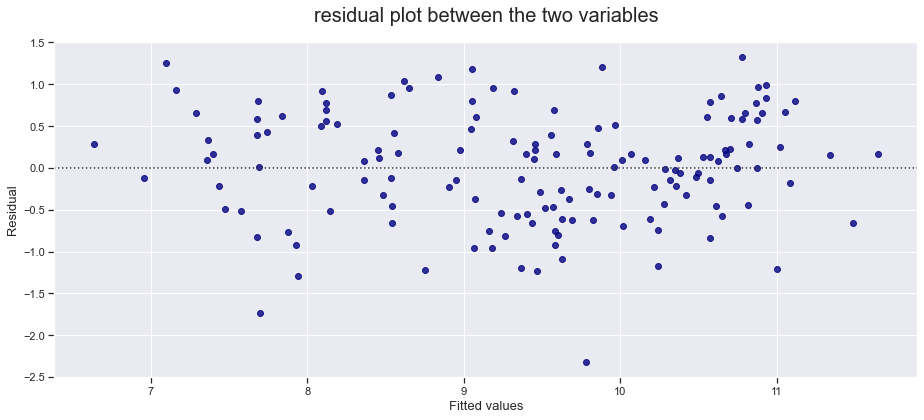

In [9]:
fig, ax = plt.subplots(figsize=(13, 6))

ax = sns.residplot(y='Ladder score 2021', x='Logged GDP per capita', data=df, color='navy')

ax.set_title(label='residual plot between the two variables', pad=20)
ax.set(ylabel='Residual', xlabel='Fitted values')
fig.tight_layout()
plt.show()

## QQplot
Both features has a scattering around the standard line, which proves normality.

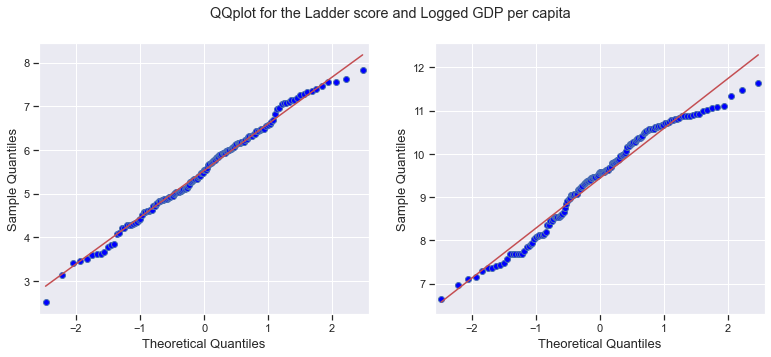

In [10]:
# check for normality by qqplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,5))
with warnings.catch_warnings(): # to supress warning
    warnings.simplefilter("ignore")
    
    qqplot(df['Ladder score 2021'], line='s', ax=ax1)
    qqplot(df['Logged GDP per capita'], line='s', ax=ax2)

fig.suptitle(t='QQplot for the Ladder score and Logged GDP per capita')
plt.show()

Now that we know the data on the two axis is normal, has constant variance, and random scattering on the residual-fitted plot, we can confidently say that the linear regression model above is proven to be reasonable.

# Linear Regression Model for Ladder Score vs Logged GDP per Capita
First thing first, we will utilize a function from seaborn to plot our regression model. The shaded region is a 95% confidence interval for the true trend line for the data.

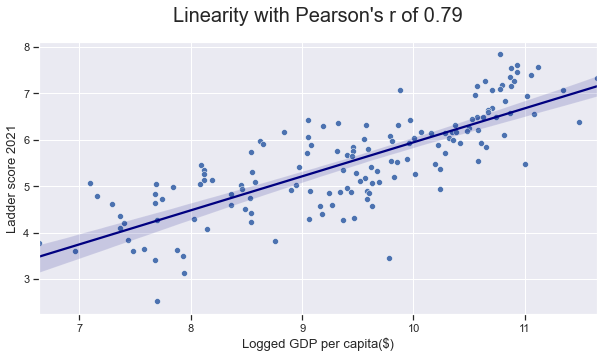

In [11]:
fig, ax = plt.subplots(figsize=figure_size)

x_axis = 'Logged GDP per capita'
y_axis = 'Ladder score 2021'

ax = sns.scatterplot(y=y_axis, x=x_axis, data=df, palette='Blues')
ax = sns.regplot(y=y_axis, x=x_axis, data=df, color='navy', scatter=False)

ax.set_title(label='Linearity with Pearson\'s r of 0.79', pad=20)
# ax.legend(loc='right', bbox_to_anchor=(1.45, 0.5))
ax.set(xlabel='Logged GDP per capita($)')

plt.show()

And now, let us go to the fun and final part of this analysis.

## Prediction Interval
For this final part, we will be using this [blog](https://machinelearningmastery.com/prediction-intervals-for-machine-learning/) written by Dr Jason Brownlee as a guidance. Although Dr Brownlee did a great job of explaining how we can plot the PI, for this analysis, the calculation of PI is attributed to Dr Irene Vrbik's Lecture notes(see references at the bottom of the page).<br>
<img src="../../images/PI_formula.png" alt="PI_formula" width="600"/>

let's first generate our parameter b1 and b0, then plot our prediction function onto the graph we just drew earlier.

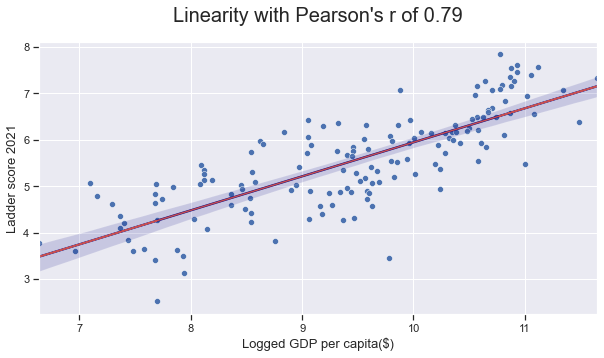

In [12]:
x = df['Logged GDP per capita']
y = df['Ladder score 2021']

b1, b0, r_value, p_value, std_err = linregress(x, y)

# regression model
yhat = b0 + b1*x 

# plotting
fig, ax = plt.subplots(figsize=figure_size)

x_axis = 'Logged GDP per capita'
y_axis = 'Ladder score 2021'
sns.scatterplot(y=y_axis, x=x_axis, data=df, palette='Blues', ax=ax)
sns.regplot(y=y_axis, x=x_axis, data=df, color='navy', scatter=False, ax=ax)

ax.plot(x, yhat, color='r')  # our function

ax.set_title(label='Linearity with Pearson\'s r of 0.79', pad=20)
# ax.legend(loc='right', bbox_to_anchor=(1.45, 0.5))
ax.set(xlabel='Logged GDP per capita($)')

plt.show()

## Plotting Error Bar
With the line we have above, the next step is to calculate the **standard error** for our model; then we can plot error bar for one of our predicted value. $s^2 formula:$ 
<img src="../../images/sample_variance_formula.png" alt="s_variance_formula" width="600"/>

In [13]:
N = len(y)
sum_square_resd = np.sum((y - yhat)**2)
sample_stddev = (1/(N-2) * sum_square_resd)  # estimate of our population standard deviation

#### Assumption with large number of sample size
Because our population size is `N = len(y) = 149` and $\alpha$=0.05, `t-crit = z-crit = 1.96` is used for the interval.

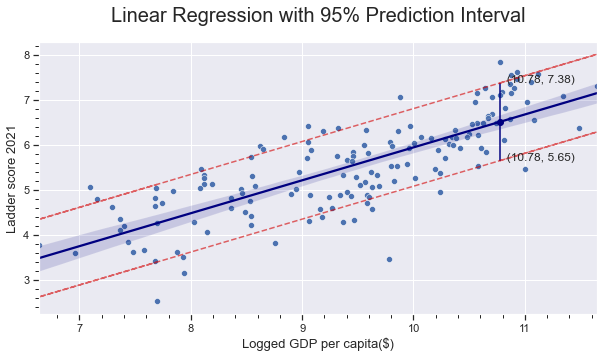

In [14]:
# let x be the first element in list x. yhat be the the prediction for the x_in
x_in = x[0]
y_out = y[0] # true value
yhat_out = yhat[0] # prediction value


Z_CRIT = 1.96  # 95% pred interval
interval_constant = Z_CRIT * sample_stddev * np.sqrt(1 + 1/N + (x_in - np.mean(x))**2 / np.sum( (x - np.mean(x))**2 ))

lower_pred, upper_pred = yhat_out - interval_constant, yhat_out + interval_constant # generate single prediction
lower_arr, upper_arr = yhat - interval_constant, yhat + interval_constant # generate array

fig, ax = plt.subplots(figsize=figure_size)

x_axis = 'Logged GDP per capita'
y_axis = 'Ladder score 2021'
sns.scatterplot(y=y_axis, x=x_axis, data=df, palette='Blues', ax=ax)
sns.regplot(y=y_axis, x=x_axis, data=df, color='navy', scatter=False, ax=ax)

# plotting upper and lower interval
ax.plot(x, upper_arr, linestyle='--', color='#D30000', alpha=.6)
ax.plot(x, lower_arr, linestyle='--', color='#D30000', alpha=.6)

# error bar for a single value of x_in
### todo: make funct drawErrorbar()
ax.errorbar(x_in, yhat_out, yerr=interval_constant, color='navy', fmt='o')
annotate(float(x_in), float(lower_pred)) # helper method to annotate at the given datapoints
annotate(float(x_in), float(upper_pred))

ax.set_title(label='Linear Regression with 95% Prediction Interval', pad=20)
# ax.legend(loc='right', bbox_to_anchor=(1.45, 0.5))
ax.set(xlabel='Logged GDP per capita($)')
ax.minorticks_on()
# ax.yaxis.set_tick_params(which='minor', left = False) # to turn off minor tick on y-axis

plt.show()

## PI Function
Lastly, to make things more dynamic, let us quickly finalize and wrap everything we just did to a function so that we can visualize a prediction interval for any given value of x.

In [15]:
def PI(logged_gdp_per_capita):
    """
    Plot Prediction Interval for the linear regression model of Ladder score 2021 vs Logged GDP per capita.
    data must be loaded to a variable name 'df' before using the function.

    Parameters
    ----------
    6.6 <= logged_gdp_per_capita <= 11.6 : float
      The explanatory value: Logged GDP per capita of a country at year 2021 in US dollars.

    Returns
    -------
    a tuple containing the prediction interval of the explanatory variable, then will plot a visualization of the prediction interval. 
    """
    # input check
    if not(6.6 <= logged_gdp_per_capita <= 11.6):
        print("due to limitation input must be between 6.6 and 11.6. see footnote for more detail.")
        return
    
    # generate linear regression model
    x = df['Logged GDP per capita']
    y = df['Ladder score 2021']

    b1, b0, r_value, p_value, std_err = linregress(x, y)

    yhat = b0 + b1*x  # prediction function

    N = len(y)
    sum_square_resd = np.sum((y - yhat)**2)
    sample_stddev = (1/(N-2) * sum_square_resd)  # estimate of our population standard deviation
    
    # let x be the first element in list x. yhat be the the prediction for the x_in
#     x_in = np.log10(gdp_per_capita)
    x_in = logged_gdp_per_capita
    yhat_out = b0 + b1 * x_in # prediction value


    Z_CRIT = 1.96  # 95% pred interval
    interval_constant = Z_CRIT * sample_stddev * np.sqrt(1 + 1/N + (x_in - np.mean(x))**2 / np.sum( (x - np.mean(x))**2 ))

    lower_pred, upper_pred = yhat_out - interval_constant, yhat_out + interval_constant # generate single prediction
    lower_arr, upper_arr = yhat - interval_constant, yhat + interval_constant # generate array

    fig, ax = plt.subplots(figsize=figure_size)
    
    x_axis = 'Logged GDP per capita'
    y_axis = 'Ladder score 2021'
    sns.scatterplot(y=y_axis, x=x_axis, data=df, palette='Blues', ax=ax)
    sns.regplot(y=y_axis, x=x_axis, data=df, color='navy', scatter=False, ax=ax)

    # plotting upper and lower interval
    ax.plot(x, upper_arr, linestyle='--', color='#D30000', alpha=.6)
    ax.plot(x, lower_arr, linestyle='--', color='#D30000', alpha=.6)

    # error bar for a single value of x_in
    ### todo: make funct drawErrorbar()
    ax.errorbar(x_in, yhat_out, yerr=interval_constant, color='navy', fmt='o')
    ax.annotate('({:.2f}, {:.2f})'.format(x_in, lower_pred), xy=(x_in, lower_pred), backgroundcolor='w', xytext=(8,0), textcoords='offset points')
    ax.annotate('({:.2f}, {:.2f})'.format(x_in, upper_pred), xy=(x_in, upper_pred), backgroundcolor='w', xytext=(8,0), textcoords='offset points')
    
    ### not sure why this didn't work
#     annotate(float(x_in), float(lower_pred)) # helper method to annotate at the given datapoints
#     annotate(float(x_in), float(upper_pred))
#     print(upper_pred, lower_pred)

    ax.set_title(label='Linear Regression with 95% Prediction Interval', pad=20)
#     ax.legend(loc='right', bbox_to_anchor=(1.45, 0.2))
    ax.set(xlabel='Logged GDP per capita($)')
    ax.minorticks_on()
    # ax.yaxis.set_tick_params(which='minor', left = False) # to turn off minor tick on y-axis

    plt.show()
    return lower_pred, upper_pred

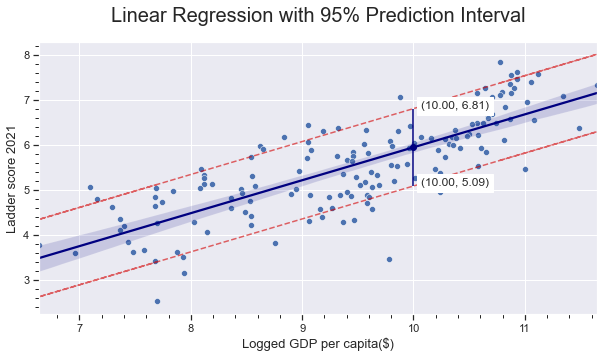

(5.088560700373304, 6.808408951345016)

In [16]:
PI(10)

To answer our second reseach question, let us find the logged gdp per capita needed for our prediction interval to lie above 5, which in this case considered 'happy'. let us first make a new function without visualization to quicken the process.

In [17]:
def PI_without_visual(logged_gdp_per_capita):
    """
    Plot Prediction Interval for the linear regression model of Ladder score 2021 vs Logged GDP per capita
    data must be loaded to a variable name 'df' before using the function.
    
    Parameters
    ----------
    6.6 <= logged_gdp_per_capita <= 11.6 : float
      The explanatory value: Logged GDP per capita of a country at year 2021 in US dollars.

    Returns
    -------
    a tuple containing the prediction interval of the explanatory variable.
    """
    # input check
    if not(6.6 <= logged_gdp_per_capita <= 11.6):
        print("due to limitation input must be between 6.6 and 11.6. see footnote for more detail.")
        return
    
    # generate linear regression model
    x = df['Logged GDP per capita']
    y = df['Ladder score 2021']

    b1, b0, r_value, p_value, std_err = linregress(x, y)

    yhat = b0 + b1*x  # prediction function

    N = len(y)
    sum_square_resd = np.sum((y - yhat)**2)
    sample_stddev = (1/(N-2) * sum_square_resd)  # estimate of our population standard deviation
    
    # let x be the first element in list x. yhat be the the prediction for the x_in
#     x_in = np.log10(gdp_per_capita)
    x_in = logged_gdp_per_capita
    yhat_out = b0 + b1 * x_in # prediction value


    Z_CRIT = 1.96  # 95% pred interval
    interval_constant = Z_CRIT * sample_stddev * np.sqrt(1 + 1/N + (x_in - np.mean(x))**2 / np.sum( (x - np.mean(x))**2 ))

    lower_pred, upper_pred = yhat_out - interval_constant, yhat_out + interval_constant # generate single prediction
    lower_arr, upper_arr = yhat - interval_constant, yhat + interval_constant # generate array
    return lower_pred, upper_pred

In [18]:
# lower, upper = PI(10) # to estimate GDP for a 6+ ladder score
# print(upper-  lower)
def find_lower_limit(limit=5):
    """
    finds the lower limit of Logged GDP per capita for a country to be considered happy.
    
    Parameters
    ----------
    limit : float
      The lowest ladder score for a country to be considered happy; default is 5

    Returns
    -------
    a tuple containing the prediction interval of the explanatory variable.
    """
    for i in np.arange(6.6, 11.8, 0.001):
        lower, upper = PI_without_visual(i)
        if lower > limit:
            return i

In [ ]:
find_lower_limit()

In [ ]:
PI(find_lower_limit())

# Conclusion
##### RQ1: Is there a trend between the Logged GDP per capita and Ladder score in the year 2021?
As mentioned above, there is a positve trend, shown by the strong Pearson's r coefficient of 0.79 between the ladder score and Logged GDP per capita.<br>
<!-- ![money_meme](https://i.redd.it/zxb19m90zf451.jpg) -->
##### RQ2: What is the minimum level of GDP per capita needed for a country to be considered happy in the year 2021?
Using the function `PI(find_lower_limit())`, we can find and visualize the minimum Logged GDP per capita needed for a country to be considered happy. For this analysis, any country with a ladder score atleast 5 is considered happy. Thus, from the graph above we can say that: we are 95% confident that the value the GDP per capita needed for a country to be happy is atleast **$10^{9.879000}=7.5683$ Billion USD**.

## Limitation and References
- Model is made with a 95% prediction interval.
- As value of ladder score that are overly close to either end of the spectrum(0-10) is off of our interest, we decided to limit the logged_gdp_per_capita to be between 6.6 and 11.8.

##### References for formulas and theories used:
Vrbik, I. (2019). Stat230 Introductory Statistics L08_1SLR. UBC Okanagan.<br>
Vrbik, I. (2019). Stat230 Introductory Statistics L08_2PredConfInt. UBC Okanagan.<br>
Vrbik, I. (2019). Stat230 Introductory Statistics L09_1Diagnostics. UBC Okanagan.<br>

In [ ]:
happiness2021 = pf.load_and_process_kaitlyn()
happiness2021.head()

In [ ]:
Happinessdatafinal = happiness2021

In [ ]:
# Task 3: Exploratory Data Analysis 
Happinessdatafinal.shape # There are 149 of the 195 countries in the world included.

In [ ]:
Happinessdatafinal.head()# Top 5 Countries are from Western Europe

In [ ]:
Happinessdatafinal.columns # There are lots of factors listed that may contribute to the Ladder Score

In [ ]:
Happinessdatafinal.nunique(axis=0) #There are 10 unique regions, and there is only one unique score for ladder score in dystopia

In [ ]:
Happinessdatafinal.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) #all countries have values

In [ ]:
HappinessAspects = Happinessdatafinal.drop(["Regional Indicator",
                                           "Standard Error of Ladder Score",
                                           "Upper Whisker",
                                           "Lower Whisker",
                                           "Explained by: Log GDP per Capita",
                                           "Explained by: Social Support",
                                           "Explained by: Healthy Life Expectancy",
                                           "Explained by: Freedom to make Life Choices",
                                           "Explained by: Generosity",
                                           "Explained by: Perceptions of Corruption",
                                           "Ladder Score in Dystopia",
                                           "Dystopia and Residual"], axis=1)
HappinessAspects.insert(0, 'Ranking', range(1, 1 + len(HappinessAspects)))
HappinessAspects.head()

In [ ]:
HappinessLadderScore = Happinessdatafinal.drop(['Regional Indicator', 
                                               'Standard Error of Ladder Score',
                                               'Upper Whisker',
                                               'Lower Whisker',
                                               'Logged GDP Per Capita','Social Support',
                                               'Healthy Life Expectancy',
                                               'Freedom to Make Life Choices',
                                               'Generosity',
                                               'Perceptions of Corruption',
                                               'Explained by: Log GDP per Capita',
                                               'Explained by: Social Support',
                                               'Explained by: Healthy Life Expectancy',
                                               'Explained by: Freedom to make Life Choices',
                                               'Explained by: Generosity',
                                               'Explained by: Perceptions of Corruption',
                                               'Ladder Score in Dystopia',
                                               'Dystopia and Residual'], axis=1)
HappinessLadderScore.head()

In [ ]:
# Showing the Ladder Score by Country
plt.figure(figsize=(40,10))
ax = sns.barplot(x="Country Name", y="Ladder score 2021", data=HappinessLadderScore, palette=sns.color_palette("flare", 200))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.title('Ladder Score by Country')
plt.show()
#Trend in Ladder Score by Ranked Country is almost linear

In [ ]:
#Plotting Ranked Happiest Countries by Logged GDP per Capita
HappinessAspects.plot(kind='scatter', x='Ranking', y='Logged GDP Per Capita')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Logged GDP per Capita')
#There's a positive correlation between 2021 Ladder score and Logged GDP Per Capita

In [ ]:
#Looking at Ladderscore vs Contribution Factors
HappinessAspectswithoutranking = HappinessAspects.drop(columns = "Ranking")
HappinessAspectswithoutranking.plot()
plt.ylabel('Ladder Score 2021')
plt.xlabel('Score')
plt.title('Ladderscore vs Contribution Factor')
# Life expectancy drops at the highest rate as Ladder Score decreases

In [ ]:
# Correlation Matrix
  
fig, ax = plt.subplots(figsize=(10,10))
corr = HappinessAspectswithoutranking.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Matrix of Ladderscore and Contribution factors')
#There's a positive correlation between ladder score and logged GDP Per Capita, Social Support, Healthy Life Expectancy, and Freedom to Make Life Choices.
#There's a negative correlation between ladder score and perceptions of corruption.

In [ ]:
cormat = HappinessAspectswithoutranking.corr()
round(cormat,2)

In [ ]:
# Looking at Ranges of contributing factors to ladder score
fig, ax = plt.subplots(figsize=(10,10))
boxplot = HappinessAspectswithoutranking.boxplot(grid=False, vert=False,fontsize=15)
plt.xlabel('Score')
plt.ylabel('Contributing Factor')
plt.title('Score Ranges of Ladder Score and Contribution Factors')

In [ ]:
# Task 4 Conducting the Analysis to Answer: Which factor has the most influence in Calculating Happiness Score?
#here's our data
happiness2021

In [ ]:
#Let's look at the happiest Country
#Calculate total 'explained by' data for Finland
total1 = [1.446,1.106,0.741,0.691,0.124,0.481]
Sum1 = sum(total1)
Sum1

In [ ]:
y = np.array([ 1.446/4.59, 1.106/4.59,0.741/4.59, 0.691/4.59, 0.481/4.59, 0.124/4.59])

colour = 'darkgreen','forestgreen','mediumseagreen','springgreen','palegreen','honeydew'

labels = ['Log GDP per Capita','Social Support','Healthy Life Expectancy','Freedom to make Life Choices','Perceptions of Corruption','Generosity']
plt.pie(y, labels = labels, colors = colour, autopct='%1.0f%%', pctdistance=.85)
plt.legend(title = "Factors")
plt.title('Factors Explaining the Ladder Score of Finland')
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1))
#The GDP and Socal Support seem to have a very strong influence On Finland's happiness score

In [ ]:
#Let's look at the least happiest Country
#Calculate total 'explained by' data for Afghanistan
total1 = [0.370,0.000,0.126,0.000,0.122,0.010]
Sum1 = sum(total1)
Sum1

In [ ]:
y = np.array([0.370/0.628,0.126/0.628,0.122/0.628,0.010/0.628])

colour = 'firebrick','indianred','lightcoral','lightsalmon'

labels = ['Log GDP per Capita','Healthy Life Expectancy','Generosity','Perceptions of Corruption']
plt.pie(y, labels = labels, colors = colour, autopct='%1.0f%%', pctdistance=.85)
plt.legend(title = "Factors")
plt.title('Factors Explaining the Ladder Score of Afghanistan')
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1))
#The GDP, Healthy Life Expectancy, and Generosity seem to have a very strong influence On Finland's happiness score

In [ ]:
plt.figure(figsize=(40,10))
ax = sns.barplot(x="Country Name", y="Logged GDP Per Capita", data=happiness2021, palette=sns.color_palette("flare", 200))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.title('Ladder Score by Country')
plt.show()
#Trend in Ladder Score by Ranked Country is almost linear

In [ ]:
HappinessAspects.plot(kind='scatter', x='Ranking', y='Logged GDP Per Capita')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Logged GDP per Capita')
#There's a positive correlation between the top 2021 Ladder scores and Logged GDP Per Capita

In [ ]:
HappinessAspects.plot(kind='scatter', x='Ranking', y='Social Support')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Social Support')
#There's a positive correlation between the top 2021 Ladder scores and Social Support

In [ ]:
HappinessAspects.plot(kind='scatter', x='Ranking', y='Healthy Life Expectancy')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Healthy Life Expectancy')
#There's a positive correlation between the top 2021 Ladder scores and Healthy Life Expectancy

In [ ]:
HappinessAspects.plot(kind='scatter', x='Ranking', y='Freedom to Make Life Choices')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Freedom to Make Life Choices')
#There's a positive correlation between the top 2021 Ladder scores and Freedom to Make Life Choices

In [ ]:
HappinessAspects.plot(kind='scatter', x='Ranking', y='Generosity')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Generosity')
#There's many outliers between the top 2021 Ladder scores and Generosity

In [ ]:
HappinessAspects.plot(kind='scatter', x='Ranking', y='Perceptions of Corruption')
plt.xlabel('Happiest Countries')
plt.title('Ranked Happiest Countries by Perceptions of Corruption')
#There's a negative correlation between the top 2021 Ladder scores and Perceptions of Corruption

In [ ]:
tup = pf.load_and_process_shaheer('../../data/raw/world-happiness-report-2021.csv','../../data/raw/world-happiness-report-2020.csv')
df = tup[0]
df2021 = tup[1]
df2020 = tup[2]

In [ ]:
def grabMaxIndex(df, amountOfMax):
    lstOfIndex = []
    lst = list(df['Ladder score difference (2021 subtracted by 2020)'])
    
    for i in range(amountOfMax,0,-1):
        lstOfIndex.append(lst.index(max(lst)))
        lst[lst.index(max(lst))] = -100
    
    return lstOfIndex
    
    
    
    

In [ ]:
lstOfIndex = grabMaxIndex(df,3)
lstOfIndex

In [ ]:
# Helper methods for graphs

In [ ]:
def getDifferenceForEachMax(df1, df2, column,lst):
    dfT1 = df1[['Country name',column]]
    dfT2 = df2[['Country name',column]]
    newLst = []
    for i in lst:
        newLst.append(dfT1.loc[i,column] - dfT2.loc[i,column])
    return newLst

In [ ]:
def getDF(df1, df2, column, lst):
    dfT = df1['Country name']
    dfT = dfT.to_frame()
    dfT = dfT.loc[lst]
    dfT.insert(1,'Difference of '+column, getDifferenceForEachMax(df1, df2, column,lst) )
    return dfT

In [ ]:
def plotByDf(df1, df2, column, lst):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(data=getDF(df2021,df2020,column,lst), x='Country name',y='Difference of '+column).set_title('Difference of '+column+' by Country',fontsize=20)

In [ ]:
plotByDf(df2021,df2020,'Ladder score',lstOfIndex)

In [ ]:
plotByDf(df2021,df2020,'Logged GDP per capita',lstOfIndex)

In [ ]:
plotByDf(df2021,df2020,'Social support',lstOfIndex)

In [ ]:
plotByDf(df2021,df2020,'Healthy life expectancy',lstOfIndex)

In [ ]:
plotByDf(df2021,df2020,'Freedom to make life choices',lstOfIndex)

In [ ]:
plotByDf(df2021,df2020,'Generosity',lstOfIndex)

In [ ]:
plotByDf(df2021,df2020,'Perceptions of corruption',lstOfIndex)

# Interpretation
#### From these graphs, we can see that the top three countries that improved their happiness the most since the height of the COVID-19 Pandemic were all focussing on improving their GDP per capita, while also keeping a focus on their nation-wide generosity. This makes sense because improving the economy and the generosity of a civilization ensures a better standard of living and quality of life. From the graphs, we can also that the perceptions of corruption generally decreased. Governments of countries must ensure that they are not abusing their power during times of uncertainty and distress, and instead use their position to better the quality of life of all citizens.